# Algorithmes

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering avec scikit-learn

<br><br></p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import python_utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Créer un Pandas DataFrame à partir du fichier CSV en question<br><br></p>


In [ ]:
data = pd.read_csv('./weather/minute_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">"Minute Weather Data"</p>
<br>


Chaque ligne dans **minute_weather.csv** contient des données méteorologiques en une minute, les variables sont:


* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [ ]:
data.shape

In [ ]:
data.head()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

échatillonnage de données<br></p>

Plusieurs ligne, nous allons prendre chaque 10ième élément 
 <br>


In [ ]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistiques 
<br><br></p>


In [ ]:
sampled_df.describe().transpose()

In [ ]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

In [ ]:
sampled_df[sampled_df['rain_duration'] == 0].shape

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

supprimer  rain_duration et rain_accumulation
<br><br></p>


In [ ]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [ ]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

combien de lignes supprimées ?
<br><br></p>


In [ ]:
rows_before - rows_after

In [ ]:
sampled_df.columns

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

 Features qui nous intéressent pour le Clustering
<br><br></p>


In [ ]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [ ]:
select_df = sampled_df[features]

In [ ]:
select_df.columns

In [ ]:
select_df

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

metter à l'echelle les Features (caractéristiuques) en utilisant StandardScaler
<br><br></p>


In [ ]:
X = StandardScaler().fit_transform(select_df)
X.shape

## En utilisant K-Means Clustering 

In [156]:
kmeans = KMeans(n_clusters=12, random_state=0)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


In [157]:
centers = model.cluster_centers_
centers1 = centers

### Plotting

In [ ]:
# source: python for data science 
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [ ]:
# Function that creates Parallel Plots
## islice('ABCDEFG', 2) --> A B
    # islice('ABCDEFG', 2, 4) --> C D
    # islice('ABCDEFG', 2, None) --> C D E F G
    # islice('ABCDEFG', 0, None, 2) --> A C E G

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)

In [ ]:
parallel_plot(P[P['relative_humidity'] < -0.5])

## En utilisant MeanShift Clustering 

In [158]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [159]:
centers = ms.cluster_centers_
centers2 = centers

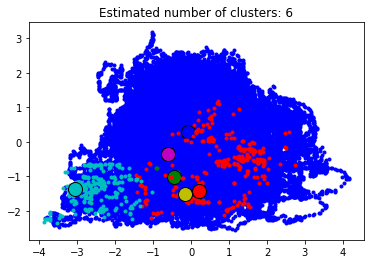

In [128]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Plotting

In [129]:
# source: python for data science 
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [130]:
# Function that creates Parallel Plots
## islice('ABCDEFG', 2) --> A B
    # islice('ABCDEFG', 2, 4) --> C D
    # islice('ABCDEFG', 2, None) --> C D E F G
    # islice('ABCDEFG', 0, None, 2) --> A C E G

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [131]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.074425,0.293240,-0.134105,-0.296197,0.012301,-0.314425,-0.121553,0
1,-0.460536,-1.017182,0.255504,10.108674,0.503374,8.723125,1.680918,1
2,0.219418,-1.412703,1.488739,8.079629,-1.443585,7.400152,1.675195,2
3,-3.057468,-1.367066,0.491655,7.788029,0.535823,8.309696,1.652301,3
4,-0.599804,-0.363050,-0.725836,14.154616,-0.751333,11.906530,1.652301,4
5,-0.173808,-1.503978,0.281743,13.036818,0.449292,13.477560,1.656116,5


C:\Users\sarae\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  # Remove the CWD from sys.path while we load stuff.


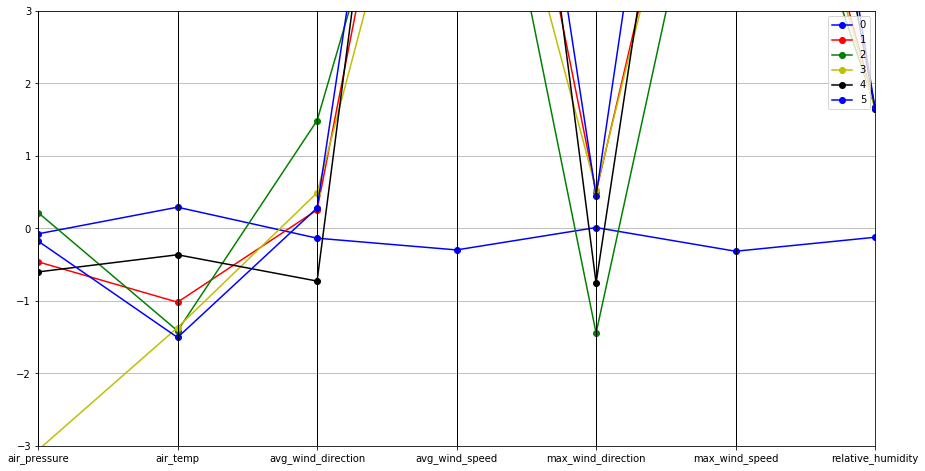

In [133]:
parallel_plot(P)

## KMeans vs MiniBatchKMeans

In [134]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [135]:
# Compute clustering with Means
np.random.seed(0)

k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [136]:
print(t_batch)

46.4154109954834


In [137]:
# Compute clustering with MiniBatchKMeans
np.random.seed(0)

batch_size = 45
mbk = MiniBatchKMeans(init='k-means++', n_clusters=12, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [138]:
print(t_mini_batch)

1.456104040145874


**Ajoutez le paramètre random_state, qu'est ce que vous osbservez ?**
On observe que les resultats ne changent pas.

## En utilisant DBSCAN

In [139]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 429


### Plotting

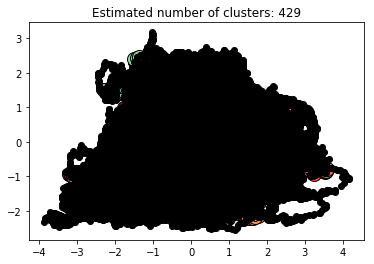

In [141]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## En utilisant Agglomerate Clustering

In [142]:
X = StandardScaler().fit_transform(select_df)
X.shape

(158680, 7)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=12).fit_predict(X)
clustering

## En utilisant Gaussian Mixture Clustering

In [144]:
from sklearn.mixture import GaussianMixture

x_messy = X
#Predict GMM cluster membership
gm_messy = GaussianMixture(12).fit(x_messy).predict(x_messy)

### Plotting

[ 5  4  8 ...  8 10  0]


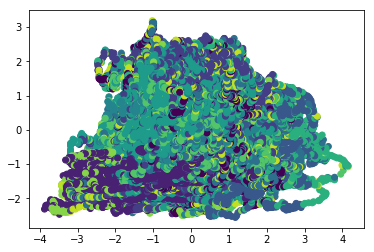

In [115]:
print(gm_messy)
plt.scatter(x_messy[:,0], x_messy[:,1], c=gm_messy)

# Résultats 

Les algorithmes que j'ai essayé:
 1. MiniBatchKMeans
 2. Mean Shift
 3. Gaussian Mixture Models
 4. DBSCAN
 5. Agglomerate

|  Algorithme | KMeans Clustering | MeanShift Clustering  | DBSCAN Clustering   |
|---|---|---|---|
|  Nombre de Clusters |  12  | 6  |  429 |

Les autres algorithmes que j'ai essayé ne m'ont pas fourni le nombre de clusters qu'ils ont générés. 

# Références

1- [scikit-learn](http://scikit-learn.org/stable/index.html)  

2- [Choix des algorithmes](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)